## BANK MARKETING 

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. 

As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.


Evaulation Metric Used  = __`RECALL`__

### `STEP 1: IMPORT LIBRARIES`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### `STEP 2: IMPORT DATASET`

In [2]:
train_data = pd.read_csv('new_train.csv')

test_data  = pd.read_csv('new_test.csv')

print("Data Imported Successfully")

Data Imported Successfully


### `STEP 3: EXPLORATORY DATA ANALYSIS / DATA CLEANING / DATA WRANGLING `

__`INDEPENDENT VARIABLE`__

|Feature|Feature_Type|Description|
|-----|-----|-----|
|age|numeric|age of a person|  
|job |categorical,nominal|type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')|  
|marital|categorical,nominal|marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)|  
|education|categorical,nominal| ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 
|default|categorical,nominal| has credit in default? ('no','yes','unknown')|  
|housing|categorical,nominal| has housing loan? ('no','yes','unknown')|  
|loan|categorical,nominal| has personal loan? ('no','yes','unknown')|  
|contact|categorical,nominal| contact communication type ('cellular','telephone')|  
|month|categorical,ordinal| last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')| 
|day_of_week|categorical,ordinal| last contact day of the week ('mon','tue','wed','thu','fri')|  
|duration|numeric| last contact duration, in seconds . Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')|
|campaign|numeric|number of contacts performed during this campaign and for this client (includes last contact)|  
|pdays|numeric| number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)|  
|previous|numeric| number of contacts performed before this campaign and for this client|  
|poutcome|categorical,nominal| outcome of the previous marketing campaign ('failure','nonexistent','success')|  

__`TARGET VARIABLE (desired output):`__  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|y|binary|has the client subscribed a term deposit? ('yes','no')|

In [3]:
train_data.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

    -  We can see there 2 format of data types:
        
        1) Object : It represents categoricals values. We have following independent variable as object type:
            - Job, 
            - Marital, 
            - Education, 
            - Default, 
            - Housing, 
            - Loan, 
            - Contact, 
            - Month,
            - Day_Of_Week,
            - POutcome
            
        2) Int64  : It represent integer value. We have following indepenedt variable as integer type:
            - Age,
            - Duration,
            - Campaign,
            - Pdays,
            - Previous
        

In [4]:
# Checking Shape 

train_data.shape, test_data.shape

((32950, 16), (8238, 13))

In [5]:
# Checking Null values

train_data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

> > __`UNIVARIANT ANALYSIS`__

In [6]:
def categorical_univariant_plot(column_name):
    print(column_name.upper() + " DISTRIBUTION")
    print(train_data[column_name].value_counts())

    plt.figure(figsize = (20,6))
    sns.countplot(x = column_name,
                  data = train_data,
                  palette = 'bone')
    plt.show()
    
    
def numerical_univariant_plot(column_name):
    plt.figure(figsize = (20,5))

    plt.subplot(1,3,1)
    sns.kdeplot(data=train_data[column_name], shade = True)

    plt.subplot(1,3,2)
    sns.distplot(train_data[column_name])

    plt.subplot(1,3,3)
    sns.boxplot(data = train_data[column_name], orient = 'horizontal')

    print(train_data[column_name].describe(), "\n")

    print("Skewness : {}, Kurtosis : {}".format(train_data[column_name].skew(), train_data[column_name].kurtosis()))

#### `GENERATION - AGE`

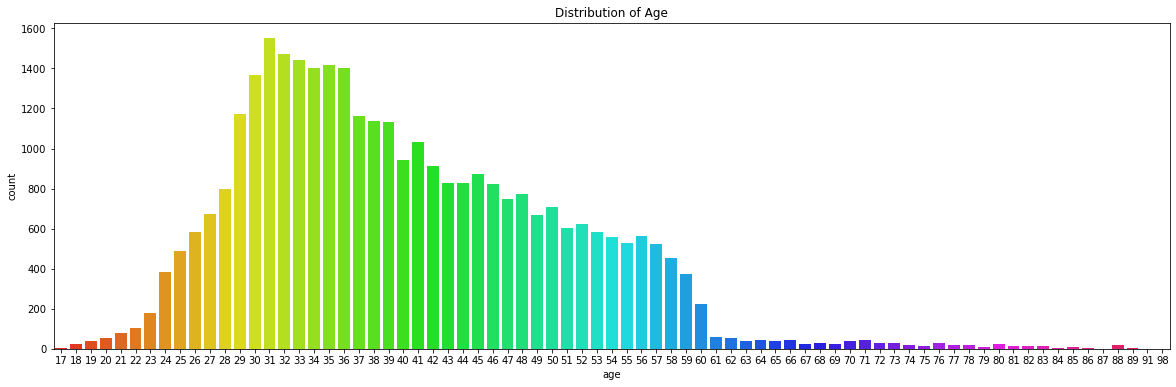

In [7]:
plt.figure(figsize = (20,6))

sns.countplot(train_data['age'], palette = 'hsv')
plt.title('Distribution of Age')
plt.show()

    - We see that people ranging 20 - 60 years of age are more in our dataset.
  
    - Min age = 17, Max age = 98
 
    - Distribution seems to be right skewed.

count    32950.000000
mean        40.014112
std         10.403636
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64 

Skewness : 0.7608189130246199, Kurtosis : 0.6722763104190985


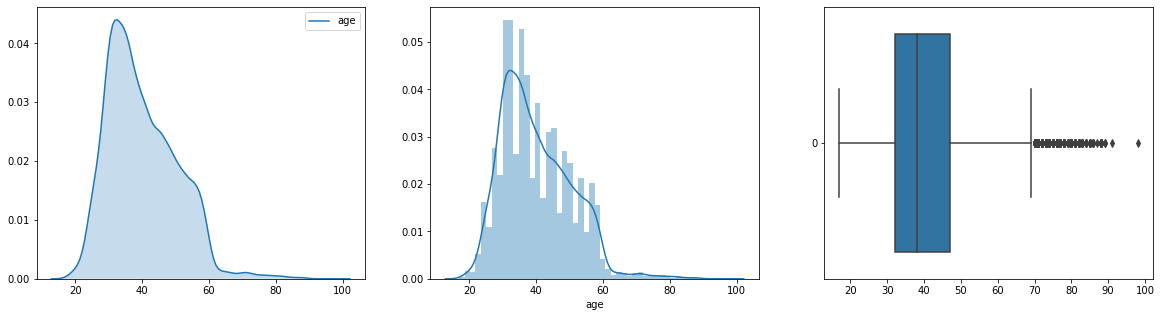

In [8]:
numerical_univariant_plot('age')

    -  We see there are some outier but they may be realistic value.
   
    -  Skewness > 0.5 -> Right Skewed, Kurtosis > 0 (Leptokurtic)

#### __`JOB POSITION`__

JOB DISTRIBUTION
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64


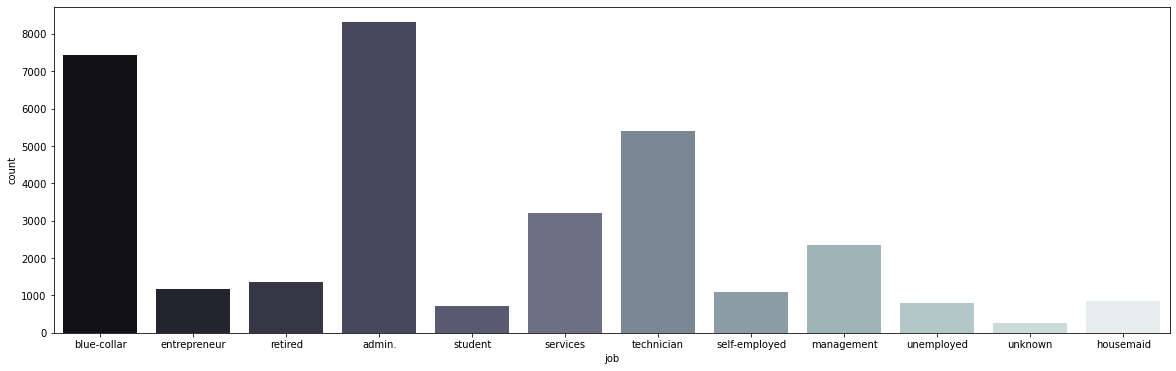

In [9]:
categorical_univariant_plot('job')

    -  We see that Admin, Blue_Color, and Technician type of persons are recorded more in our dataset. 
    
    -  Max = Admin, Min = Unknown category type of people. May be they did not disclosed their job type.
    

####  __`MARITAL STATUS`__

MARITAL DISTRIBUTION
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64


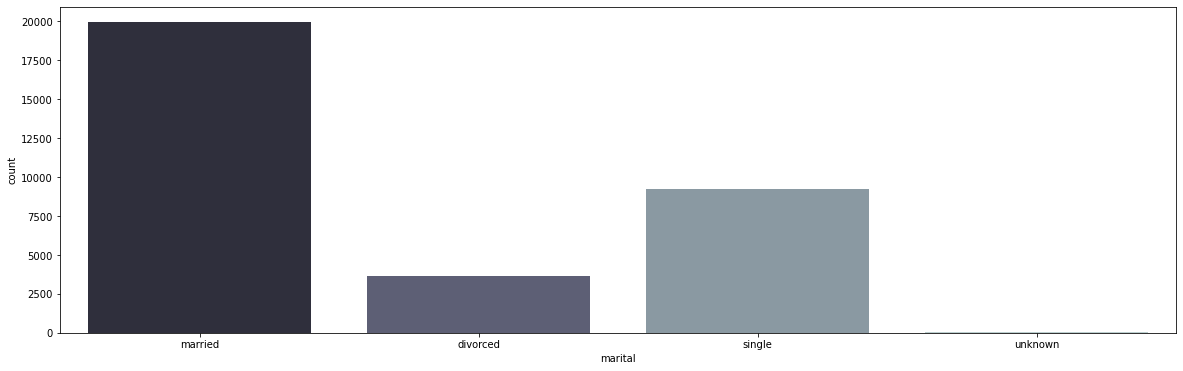

In [10]:
categorical_univariant_plot('marital')

    - We see that married people are more in number as compared to single or divorced.

#### `DEFAULT CREDIT`

DEFAULT DISTRIBUTION
no         26007
unknown     6940
yes            3
Name: default, dtype: int64


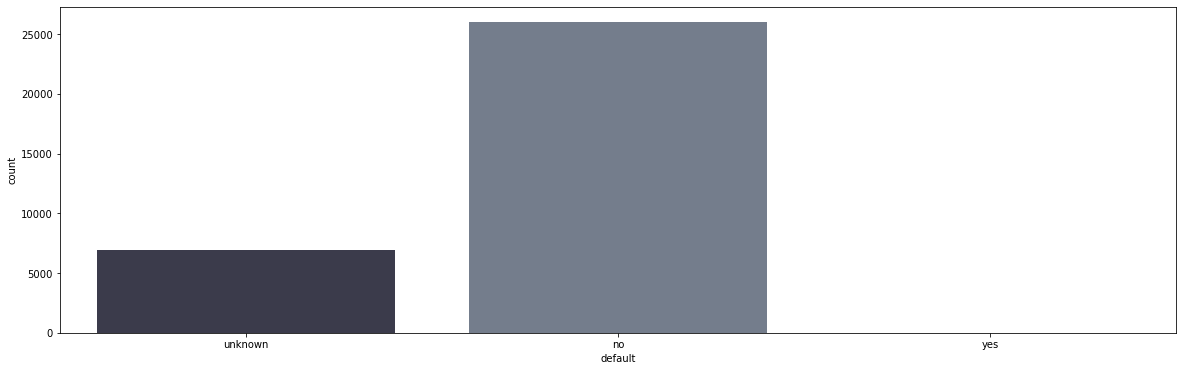

In [11]:
categorical_univariant_plot('default')

    - More than 70% of our data set comprises of the customers who did not took credit from teh bank.
    
    - It can also implies that they may have taken the credit and repayed so we say huge number records containing No.

__`HOUSING LOAN`__

HOUSING DISTRIBUTION
yes        17254
no         14900
unknown      796
Name: housing, dtype: int64


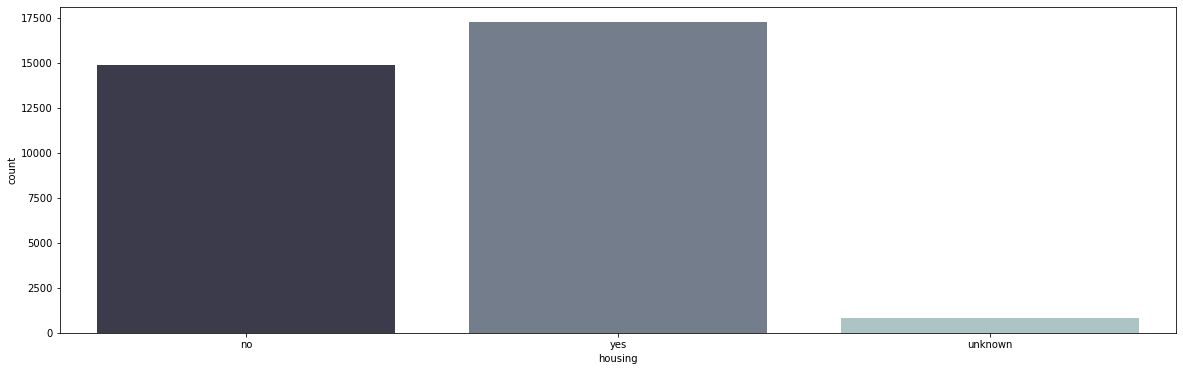

In [12]:
categorical_univariant_plot('housing')

    - Most of the customers have not taken Housing Loan

__`PERSONAL LOAN`__

LOAN DISTRIBUTION
no         27131
yes         5023
unknown      796
Name: loan, dtype: int64


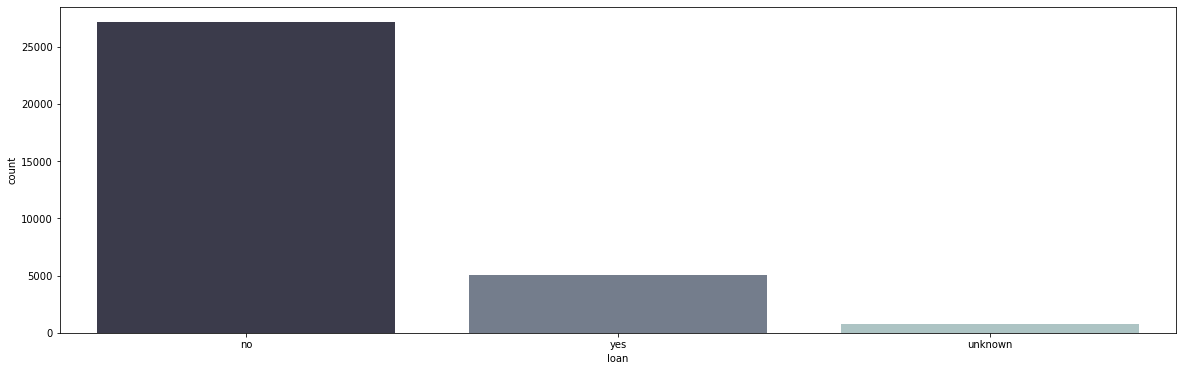

In [13]:
categorical_univariant_plot('loan')

    - Most of the customers have not taken Personal Loan

#### `MEDIUM OF CONTACT`

CONTACT DISTRIBUTION
cellular     20908
telephone    12042
Name: contact, dtype: int64


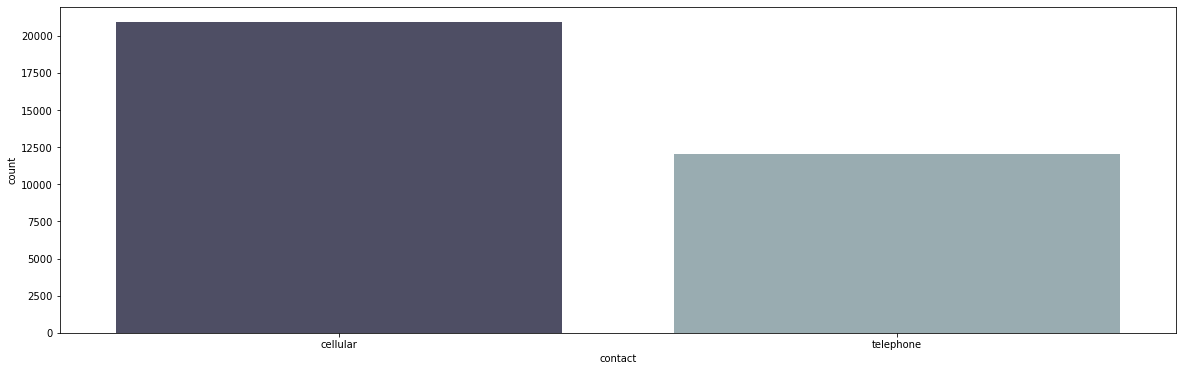

In [14]:
categorical_univariant_plot('contact')

    - Most of the bank marketing happened via calling curomers mobile phone.

#### `MONTH OF YEAR`

MONTH DISTRIBUTION
may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64


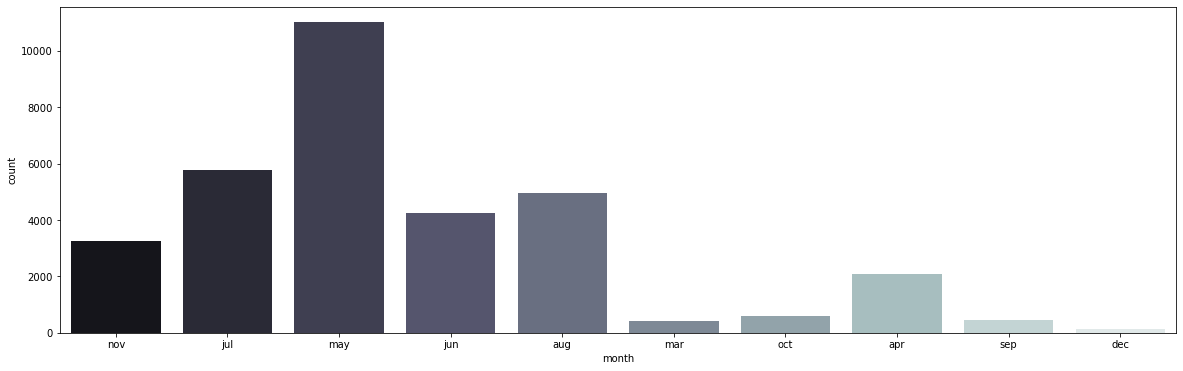

In [15]:
categorical_univariant_plot('month')

    - Most of the Bank Marketing happend in month of May and least in December.


#### `DAY OF WEEK`

DAY_OF_WEEK DISTRIBUTION
thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64


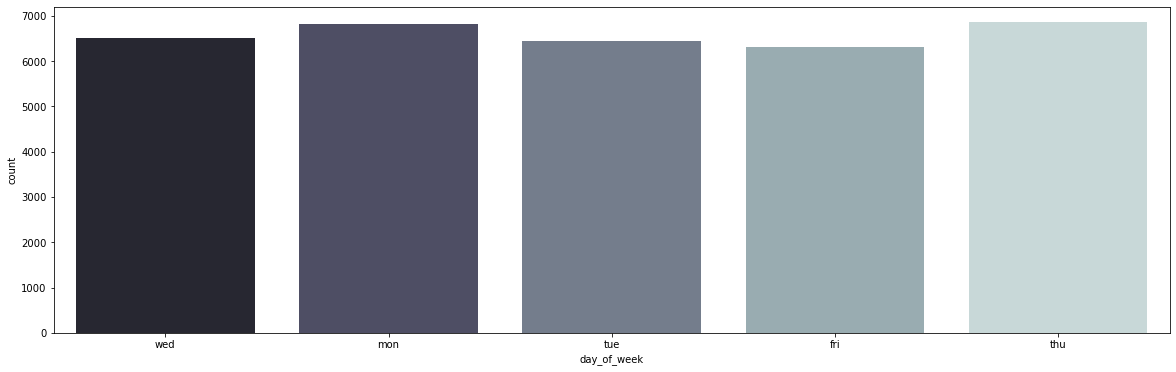

In [16]:
categorical_univariant_plot('day_of_week')

    - Day_Of_Week looks to be uniform ditributed.

#### `DURATION OF TALK`

count    32950.000000
mean       258.127466
std        258.975917
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64 

Skewness : 3.326611599428937, Kurtosis : 21.451250603806464


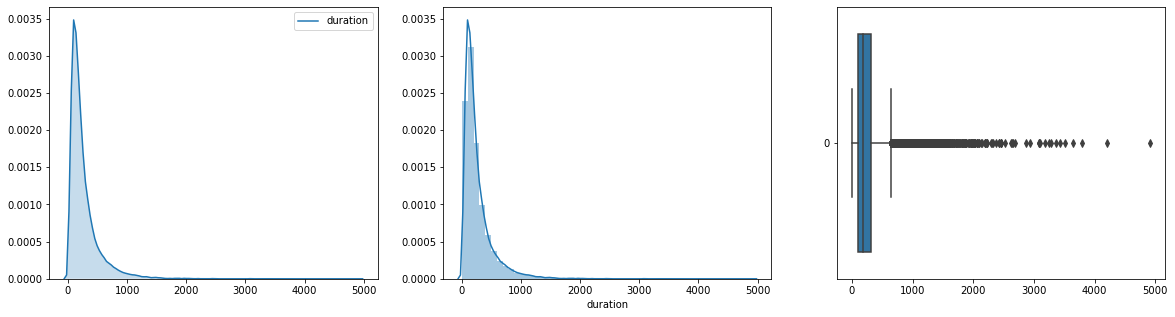

In [17]:
numerical_univariant_plot('duration')

    - There are some outlier values observed. 
 
    - They can be realistic value as the customer might be really intrested to know more so explaining took time.
   
    - Skewness > 0 implies that it is right skewwed. Kurtosis > 0 (Leptokurtic).

#### `CAMPAIGN - NOS OF CONTACTS PERFORMED`

count    32950.000000
mean         2.560607
std          2.752326
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64 

Skewness : 4.742536895362493, Kurtosis : 36.97060039842992


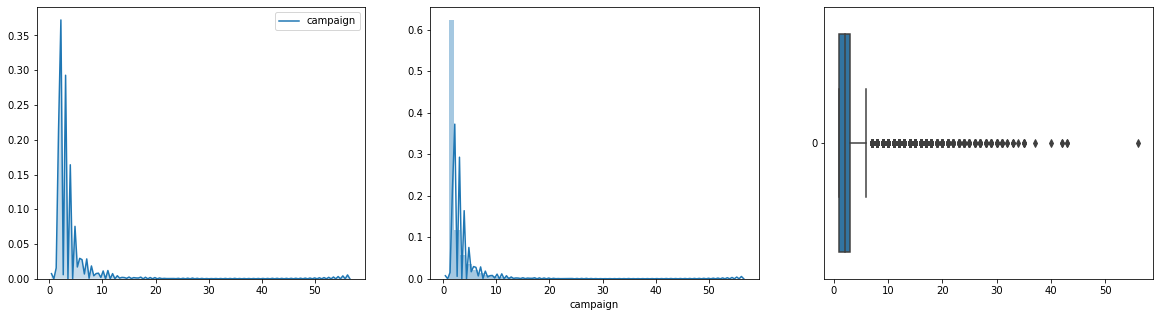

In [18]:
numerical_univariant_plot('campaign')

    - Skewness and Kurtosis values are observed to be very high. We will have to look into it later 

<br>

> > __`BIVARIANT ANALYSIS`__

In [19]:
def categorical_categorical(col1):
    a = pd.crosstab(index = train_data[col1], columns = train_data['y'])
    print(a.unstack())

    a.plot(kind = 'bar', stacked = True)
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
    plt.show()  

y    job          
no   admin.           7244
     blue-collar      6926
     entrepreneur     1060
     housemaid         769
     management       2076
     retired          1018
     self-employed     980
     services         2942
     student           494
     technician       4815
     unemployed        682
     unknown           232
yes  admin.           1070
     blue-collar       515
     entrepreneur      100
     housemaid          86
     management        269
     retired           348
     self-employed     119
     services          254
     student           217
     technician        585
     unemployed        116
     unknown            33
dtype: int64


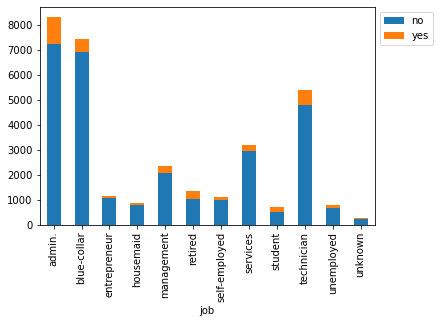

y    marital 
no   divorced     3304
     married     17933
     single       7947
     unknown        54
yes  divorced      371
     married      2020
     single       1310
     unknown        11
dtype: int64


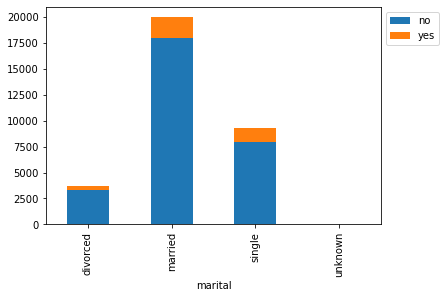

y    education          
no   basic.4y               2978
     basic.6y               1709
     basic.9y               4457
     high.school            6781
     illiterate               13
     professional.course    3719
     university.degree      8391
     unknown                1190
yes  basic.4y                344
     basic.6y                156
     basic.9y                369
     high.school             815
     illiterate                3
     professional.course     473
     university.degree      1345
     unknown                 207
dtype: int64


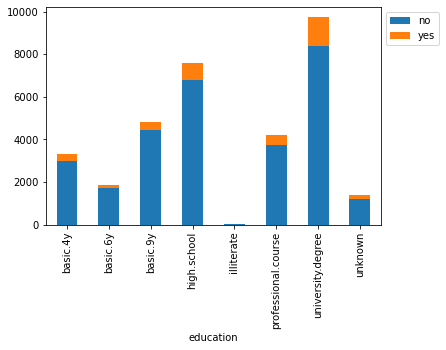

y    default
no   no         22656
     unknown     6579
     yes            3
yes  no          3351
     unknown      361
     yes            0
dtype: int64


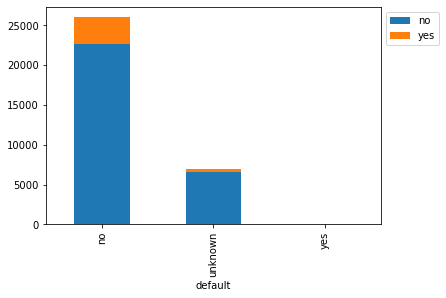

y    housing
no   no         13272
     unknown      706
     yes        15260
yes  no          1628
     unknown       90
     yes         1994
dtype: int64


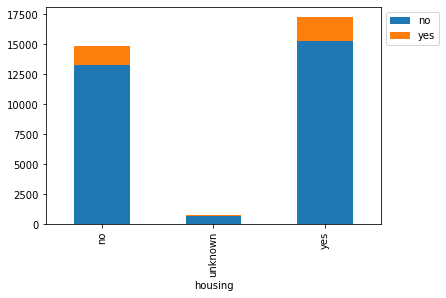

y    loan   
no   no         24073
     unknown      706
     yes         4459
yes  no          3058
     unknown       90
     yes          564
dtype: int64


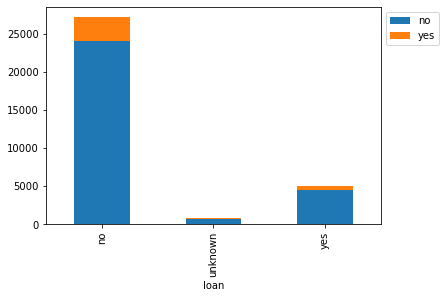

y    contact  
no   cellular     17834
     telephone    11404
yes  cellular      3074
     telephone      638
dtype: int64


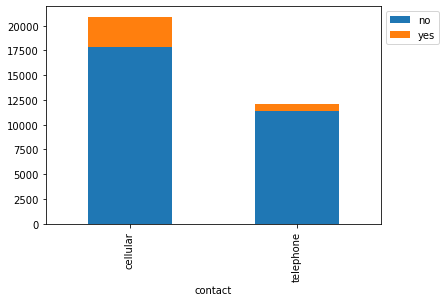

y    month
no   apr       1658
     aug       4417
     dec         71
     jul       5231
     jun       3806
     mar        219
     may      10312
     nov       2934
     oct        333
     sep        257
yes  apr        427
     aug        531
     dec         72
     jul        532
     jun        441
     mar        217
     may        699
     nov        332
     oct        254
     sep        207
dtype: int64


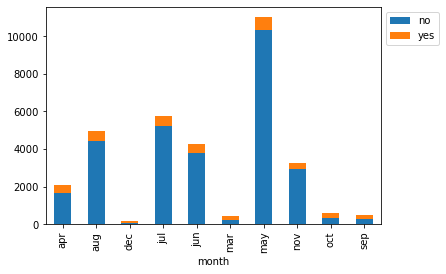

In [20]:
categorical_columns = ['job','marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

for col1 in categorical_columns:
    categorical_categorical(col1)

Summary : 
    
    - Teachnician/ Admin/ Blue Collor where seem to be our targeted customers.
    
    - People those who completed their basic along with high school and university degree are more likely to deposit.
    
    - Most of the clients who are not having Defaults / Personal Loans are likely to go for term deposit.
    
    - People having housing loan where in the lead as compared to who did not opeted for housing loan.
    
    - Most of the clinet who where intrested where contacted by cell phones.
    
    - May month recorded highest number of negative as well as postive feedbacks from clients.
    

<br>

In [25]:
train_data_copy = train_data.copy()

In [46]:
# Converting into binary outcome as we need to calculate recall score at each fold.

train_data_copy['y'].replace({
    'no' : 0,
    'yes': 1
}, inplace = True)

In [50]:
# Splitting Data - Independent & Dependent

X = train_data_copy.drop(columns = ['y'],
                         axis = 1)

y = train_data_copy['y']

In [51]:
y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [59]:
# define actual
act_pos = [1 for _ in range(3713)]
act_neg = [0 for _ in range(29239)]
y_true = act_pos + act_neg
len(y_true)

32952

<br>

In [49]:
y.value_counts(normalize = True)

0    0.887344
1    0.112656
Name: y, dtype: float64

    -The class is highly imbalance, so we will use classweigths / auto_class_weigths / scale_pos_weight / is_unbalnced

### `CATBOOST - VANILLA MODEL`

In [28]:
categorical_columns = ['job' ,'marital', 'education' ,'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [102]:
import time 
import catboost as cb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score

kfold  = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = []

start_time = time.time()
for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    print('\nFold: {}\n'.format(i+1))
    
    # Instantiate model
    model1 = cb.CatBoostClassifier(n_estimators=100,
                                   auto_class_weights='Balanced',
                                   cat_features=categorical_columns,
                                   custom_metric = ['AUC'])
    
    # Fitting Model
    model1.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=0)
    
    
    # Predicting Result on Validation
    y_val_pred = model1.predict(X_val)
    score = recall_score(y_val, y_val_pred)
    print("Recall Score : {}".format(score))
    scores.append(score)
    print("\n")
    print("\t\t\tCLASSIFICATION REPORT:\n")
    print(classification_report(y_val, y_val_pred))
    print("\t\t\tCONFUSION MATRIX:\n")
    print(pd.crosstab(y_val.values.flatten(), y_val_pred, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")
    
a = []

for each in scores:
    a.append(each*100)

print("Average Recall Score      : {}".format(np.sum(scores)/len(scores)))
#predict1 = np.sum(scores)/len(scores)

end_time = time.time()
print("Execution_Time in seconds : {}".format(end_time - start_time))


Fold: 1

Recall Score : 0.8842530282637954


			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5848
           1       0.40      0.88      0.56       743

    accuracy                           0.84      6591
   macro avg       0.69      0.86      0.73      6591
weighted avg       0.92      0.84      0.86      6591

			CONFUSION MATRIX:

Predicted Species     0    1
Actual Species              
0                  4881  967
1                    86  657 


Fold: 2

Recall Score : 0.873485868102288


			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5848
           1       0.43      0.87      0.57       743

    accuracy                           0.85      6591
   macro avg       0.70      0.86      0.74      6591
weighted avg       0.92      0.85      0.87      6591

			CONFUSION MATRIX:

Predicted Species     0    1
Actual Spe

Summary: 

    1) Case1:
      -  5 Folds - 100 estimators = 0.8814669167395239 (08 seconds)
      - 10 Folds - 100 estimators = 0.8806553053357679 (15 seconds)

    -> We saw when we are increasing the nos. of folds with default estimators we saw decrease in our score.

    2) Case 2:
      - 5  Folds  - 500 estimators = 0.8801159428702029 (1.5 min)
      - 10 Folds  - 500 estimators = 0.8793054227168652 (3.5 min)

    -> We saw the recall score decrease as we increase the nos of folds along with n_estimators

### `LIGHTGBM - VANILLA MODEL`

In [165]:
train_data_LGBM = train_data.copy()

In [166]:
# Integer Encoding - LightGBM offers good accuracy with integer-encoded categorical features.

train_data_LGBM['job'].replace({
    'admin.'        : 0,
    'blue-collar'   : 1,
    'technician'    : 2,
    'services'      : 3,
    'management'    : 4,
    'retired'       : 5,
    'entrepreneur'  : 6,
    'self-employed' : 7,
    'housemaid'     : 8,
    'unemployed'    : 9,
    'student'       : 10,
    'unknown'       : 11
}, inplace = True)


train_data_LGBM['marital'].replace({
    'divorced'  : 0,
    'single'    : 1,
    'married'   : 2,
    'unknown'   : 3
}, inplace = True)


train_data_LGBM['education'].replace({
    'illiterate'          : 0,
    'unknown'             : 1,
    'basic.4y'            : 2,
    'basic.6y'            : 3,
    'basic.9y'            : 4,
    'high.school'         : 5,
    'university.degree'   : 6,
    'professional.course' : 7
}, inplace = True)


train_data_LGBM['contact'].replace({
    'cellular'  : 0,
    'telephone' : 1,
}, inplace = True)


train_data_LGBM['month'].replace({
    'mar'  : 0,
    'apr'  : 1,
    'may'  : 2,
    'jun'  : 3,
    'jul'  : 4,
    'aug'  : 5,
    'sep'  : 6,
    'oct'  : 7,
    'nov'  : 8,
    'dec'  : 9
}, inplace = True)


train_data_LGBM['day_of_week'].replace({
    'mon' : 0,
    'tue' : 1,
    'wed' : 2,
    'thu' : 3,
    'fri' : 4
}, inplace = True)


train_data_LGBM['poutcome'].replace({
    'nonexistent' : 0,
    'failure'     : 1,
    'success'     : 2  
}, inplace = True)


train_data_LGBM['default'].replace({
    'no'      : 0,
    'unknown' : 1,
    'yes'     : 2,
}, inplace = True)


train_data_LGBM['housing'].replace({
    'no'      : 0,
    'unknown' : 1,
    'yes'     : 2
}, inplace = True)


train_data_LGBM['loan'].replace({
    'no'      : 0,
    'unknown' : 1,
    'yes'     : 2
}, inplace = True)


train_data_LGBM['y'].replace({
    'no'  : 0,
    'yes' : 1
}, inplace = True)

In [167]:
# Splitting Data  - Independent & Dependent

X  = train_data_LGBM.drop(columns = ['y'],
                          axis = 1)

y = train_data_LGBM['y']

In [168]:
categorical_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 14]

In [177]:
import time 
import lightgbm as lg
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score

kfold  = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = []

start_time = time.time()
for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
    print('\nFold: {}\n'.format(i+1))
    
    # Instantiate model
    model2 = lg.LGBMClassifier(n_estimators = 100,
                               objective = 'binary',
                               is_unbalance = True,
                               metric = 'auc',
                               cat_feature = categorical_columns)
    
    # Fitting Model
    model2.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=0)
    
    
    # Predicting Result on Validation
    y_val_pred = model2.predict(X_val)
    score = recall_score(y_val, y_val_pred)
    scores.append(score)
    print("\n")
    print("\t\t\tCLASSIFICATION REPORT:\n")
    print(classification_report(y_val, y_val_pred))
    print("\t\t\tCONFUSION MATRIX:\n")
    print(pd.crosstab(y_val.values.flatten(), y_val_pred, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")
    
a = []

for each in scores:
    a.append(each*100)

print("Average Recall Score      : {}".format(np.sum(scores)/len(scores)))
#predict2 = np.sum(scores)/len(scores)

end_time = time.time()
print("Execution_Time in seconds : {}".format(end_time - start_time))


Fold: 1



			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1462
           1       0.41      0.88      0.56       186

    accuracy                           0.84      1648
   macro avg       0.70      0.86      0.73      1648
weighted avg       0.92      0.84      0.87      1648

			CONFUSION MATRIX:

Predicted Species     0    1
Actual Species              
0                  1225  237
1                    22  164 


Fold: 2



			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1462
           1       0.41      0.83      0.55       186

    accuracy                           0.84      1648
   macro avg       0.69      0.84      0.73      1648
weighted avg       0.91      0.84      0.87      1648

			CONFUSION MATRIX:

Predicted Species     0    1
Actual Species              
0                  1236  226
1                  



			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1462
           1       0.41      0.84      0.56       185

    accuracy                           0.85      1647
   macro avg       0.70      0.85      0.73      1647
weighted avg       0.91      0.85      0.87      1647

			CONFUSION MATRIX:

Predicted Species     0    1
Actual Species              
0                  1241  221
1                    29  156 


Fold: 19



			CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1461
           1       0.43      0.86      0.57       185

    accuracy                           0.86      1646
   macro avg       0.71      0.86      0.74      1646
weighted avg       0.92      0.86      0.88      1646

			CONFUSION MATRIX:

Predicted Species     0    1
Actual Species              
0                  1251  210
1                    26  159

Summary : 
    
    1) Case 1:
         - 5  Folds - 100 estimators = 0.8723061 (03 seconds)
         - 10 Folds - 100 estimators = 0.8798481 (03 seconds)
         - 15 Folds - 100 estimators = 0.8714890 (04 seconds)
         - 20 Folds - 100 estimators = 0.8795829 (05 seconds)
         
    2) Case  2:
         - 5  Folds - 500 estimators = 0.8723061 (04 seconds)
         - 10 Folds - 500 estimators = 0.8782308 (06 seconds)
         - 15 Folds - 500 estimators = 0.8685255 (12 seconds)
         - 20 Folds - 500 estimators = 0.8774266 (14 seconds)
         
    Note: K = 10 gave better result for our base model.

### `ENSEMBLING - CATBOOST & LIGHTGBM`

    - We will use K = 10 and N_Estimators = 100 and perform Weighted Averaging

In [183]:
predict1 = 0.8798481
predict2 = 0.8782308

final_predict = (0.95 * predict1 + 0.05* predict2)

print("Final recall score : {}".format(final_predict))

Final recall score : 0.879767235


Summary: 
    
    1) predict1-> CATBOOST
       predict2-> LIGHTGBM

        0.60 * predict1 + 0.4  * predict2 -> 0.87920118
        0.70 * predict1 + 0.3  * predict2 -> 0.87936291
        0.80 * predict1 + 0.2  * predict2 -> 0.87952464
        0.90 * predict1 + 0.1  * predict2 -> 0.87968636
        0.95 * predict1 + 0.05 * predict2 -> 0.87976724
    
    2) From the observations above, we can observe that CATBBOOST was performing better.

### `CONCLUSION`

    1) CATBOOST perfomed well on BASE MODELS

    2) We can go ahead in tuning the paramters and derive meaningfull features if possible and check the recll score.
    
    3) Giving more weights to CATBOOST resulted in getting closer to the individiual performance of CATBOOST algorithm.
    
    4) As the nos. of folds along with estimator increase recall scored decreased. (K = 10 gave best result).